# Supervised Learning - Classification

### Naive Bayes Algorithm:

**Naive Bayes Algorithm:**
Naive Bayes is a simple probabilistic classifier based on Bayes' theorem. It assumes that the presence of a particular feature in a class is independent of the presence of other features. Despite its simplistic assumptions, Naive Bayes can perform well on a wide range of classification problems.

*Implementation of Naive Bayes Algorithm*

In [37]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
#defining the naive_bayes 
def naive_bayes(x_train, y_train, x_test):
    # Compute class probabilities
    unique_classes = np.unique(y_train)
    class_probs = {}
    for cls in unique_classes:
        cls_indices = np.where(y_train == cls)
        class_probs[cls] = len(cls_indices[0]) / len(y_train)

    # Compute feature probabilities
    feature_probs = {}
    for feature_idx in range(x_train.shape[1]):
        feature_probs[feature_idx] = {}
        unique_features = np.unique(x_train[:, feature_idx])
        for feature in unique_features:
            feature_probs[feature_idx][feature] = {}
            for cls in unique_classes:
                cls_indices = np.where(y_train == cls)
                feature_indices = np.where(x_train[cls_indices[0], feature_idx] == feature)
                feature_probs[feature_idx][feature][cls] = len(feature_indices[0]) / len(cls_indices[0])

    # Predict the class labels for test instances
    y_pred = []
    for test_instance in x_test:
        max_prob = -1
        pred_cls = None
        for cls in unique_classes:
            prob = class_probs[cls]
            for feature_idx, feature_value in enumerate(test_instance):
                if feature_value in feature_probs[feature_idx]:
                    prob *= feature_probs[feature_idx][feature_value][cls]
            if prob > max_prob:
                max_prob = prob
                pred_cls = cls
        y_pred.append(pred_cls)

    return y_pred


### K-Nearest Neighbors (KNN) algorithm

**K-Nearest Neighbors Algorithm:**
K-Nearest Neighbors is a non-parametric algorithm used for classification and regression tasks. It classifies a new instance based on the majority vote of its K nearest neighbors in the feature space

*Implementation of K-Nearest Neighbours algorithm*

In [39]:
def k_nearest_neighbors(x_train, y_train, x_test, k=5):
    y_pred = []
    for test_instance in x_test:
        distances = []
        for train_instance in x_train:
            distance = np.linalg.norm(test_instance - train_instance)
            distances.append(distance)
        nearest_indices = np.argsort(distances)[:k]
        nearest_classes = y_train[nearest_indices]
        unique_classes, class_counts = np.unique(nearest_classes, return_counts=True)
        pred_cls = unique_classes[np.argmax(class_counts)]
        y_pred.append(pred_cls)

    return y_pred


Implementation of the algorithm

In [40]:
#aquring the data
df = pd.read_csv(r'C:\Users\rahul\Documents\ML project\ML-assignments\titanic\gender_submission.csv') 
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [41]:
def train_test_split(x, y, test_size=0.2):
    num_instances = x.shape[0]
    num_test_instances = int(test_size * num_instances)
    indices = np.random.permutation(num_instances)
    test_indices = indices[:num_test_instances]
    train_indices = indices[num_test_instances:]
    x_train = x[train_indices]
    y_train = y[train_indices]
    x_test = x[test_indices]
    y_test = y[test_indices]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2)


In [42]:
# Naive Bayes
nb_predictions = naive_bayes(x_train, y_train, x_test)

# K-Nearest Neighbors
knn_predictions = k_nearest_neighbors(x_train, y_train, x_test)


In [43]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

nb_accuracy = accuracy(y_test, nb_predictions)
knn_accuracy = accuracy(y_test, knn_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)


Naive Bayes Accuracy: 0.6024096385542169
K-Nearest Neighbors Accuracy: 0.5060240963855421


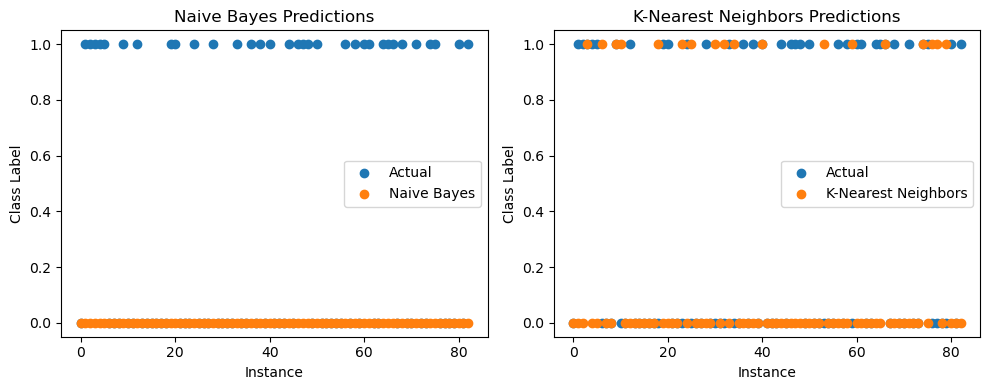

In [44]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_test)), nb_predictions, label='Naive Bayes')
plt.xlabel('Instance')
plt.ylabel('Class Label')
plt.title('Naive Bayes Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_test)), knn_predictions, label='K-Nearest Neighbors')
plt.xlabel('Instance')
plt.ylabel('Class Label')
plt.title('K-Nearest Neighbors Predictions')
plt.legend()

plt.tight_layout()
plt.show()
